best result

ROC-AUC for Binary Classification:
ROC-AUC
XGBoost	0.8864

ROC-AUC for Multi-Class Classification:
ROC-AUC
XGBoost	0.8042

In [25]:
import pandas as pd

# Path to the dataset
csv_file_path = '/content/01_credit_ratings_tabular_clean.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Rating,Name,Ticker,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating_Merged,Rating_Encoded_Multiclass,Rating_Encoded_Binary
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A,0,1
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,BBB,5,1
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,BBB,5,1
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB,5,1
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,BBB,5,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Ticker                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

# Task
Analyze the performance of models for both binary and multi-class classification tasks. Identify the best-performing models based on accuracy ranking and discuss insights from various evaluation metrics and error analysis. This analysis should include preprocessing the data by dropping the columns 'Rating', 'Name', and 'Rating Agency Name', converting the 'Date' column to datetime objects, and applying Label Encoding to the 'Sector' and 'Ticker' columns. The analysis should also include training and evaluating Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Decision Tree, Random Forest, XGBoost, Support Vector Machine (SVM), and a simple Deep Neural Network models, and calculating Accuracy, Balanced Accuracy, Precision, Recall, F1-Score, ROC-AUC, Log Loss, and Top-K accuracy (if applicable). Additionally, provide a conceptual discussion of False Positive, False Negative, Type I Error, Type II Error, Bias Error, Variance Error, Misclassification Error, and Cost-Sensitive Error. The data for this analysis is available in the dataframe `df`.

## Data Preprocessing

### Subtask:
Drop the columns 'Rating', 'Name', and 'Rating Agency Name' from the DataFrame. Convert the 'Date' column to datetime objects. Apply Label Encoding to the 'Sector' and 'Ticker' columns to convert categorical data into numerical format suitable for machine learning models.


**Reasoning**:
The subtask requires dropping specified columns, converting the 'Date' column to datetime objects, and applying Label Encoding to the 'Sector' and 'Ticker' columns. This can be achieved in a single code block.



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop the columns 'Rating', 'Name', and 'Rating Agency Name'
df = df.drop(columns=['Rating', 'Name', 'Rating Agency Name'])

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Sector' column
df['Sector_Encoded'] = label_encoder.fit_transform(df['Sector'])

# Apply Label Encoding to 'Ticker' column
df['Ticker_Encoded'] = label_encoder.fit_transform(df['Ticker'])

# Display the first few rows of the modified DataFrame and its info to verify changes
display(df.head())
df.info()

,Ticker,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating_Merged,Rating_Encoded_Multiclass,Rating_Encoded_Binary,Sector_Encoded,Ticker_Encoded
0,WHR,2015-11-27,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,...,0.049351,7.057088,15.565438,0.058638,3.906655,A,0,1,2,566
1,WHR,2014-02-13,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,...,0.048857,6.460618,15.914250,0.067239,4.002846,BBB,5,1,2,566
2,WHR,2015-03-06,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,...,0.044334,10.491970,18.888889,0.074426,3.483510,BBB,5,1,2,566
3,WHR,2012-06-15,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,...,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB,5,1,2,566
4,WHR,2016-10-24,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,...,0.053770,8.293505,15.808147,0.058065,3.857790,BBB,5,1,2,566


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Ticker                              2029 non-null   object        
 1   Date                                2029 non-null   datetime64[ns]
 2   Sector                              2029 non-null   object        
 3   currentRatio                        2029 non-null   float64       
 4   quickRatio                          2029 non-null   float64       
 5   cashRatio                           2029 non-null   float64       
 6   daysOfSalesOutstanding              2029 non-null   float64       
 7   netProfitMargin                     2029 non-null   float64       
 8   pretaxProfitMargin                  2029 non-null   float64       
 9   grossProfitMargin                   2029 non-null   float64       
 10  operatingProfitMargin   

## Prepare Data for Classification Tasks

### Subtask:
Separate the features (X) and target (y) for two classification tasks: Binary Classification (using 'Rating_Encoded_Binary' as target) and Multi-Class Classification (using 'Rating_Encoded_Multiclass' as target). Then, split the preprocessed data into training and testing sets for both tasks to ensure proper model evaluation.


**Reasoning**:
The subtask requires separating features and targets for both binary and multi-class classification, and then splitting these into training and testing sets. The `train_test_split` function from `sklearn.model_selection` is ideal for this purpose.



In [4]:
from sklearn.model_selection import train_test_split

# Define the feature set X by dropping specified columns
X = df.drop(columns=['Rating_Encoded_Binary', 'Rating_Encoded_Multiclass', 'Rating_Merged', 'Date', 'Sector', 'Ticker'])

# Define the target variable for binary classification
y_binary = df['Rating_Encoded_Binary']

# Define the target variable for multi-class classification
y_multiclass = df['Rating_Encoded_Multiclass']

# Split data into training and testing sets for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Split data into training and testing sets for multi-class classification
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets
print("Binary Classification Splits:")
print(f"X_train_binary shape: {X_train_binary.shape}")
print(f"X_test_binary shape: {X_test_binary.shape}")
print(f"y_train_binary shape: {y_train_binary.shape}")
print(f"y_test_binary shape: {y_test_binary.shape}")

print("\nMulti-Class Classification Splits:")
print(f"X_train_multiclass shape: {X_train_multiclass.shape}")
print(f"X_test_multiclass shape: {X_test_multiclass.shape}")
print(f"y_train_multiclass shape: {y_train_multiclass.shape}")
print(f"y_test_multiclass shape: {y_test_multiclass.shape}")

Binary Classification Splits:
X_train_binary shape: (1623, 27)
X_test_binary shape: (406, 27)
y_train_binary shape: (1623,)
y_test_binary shape: (406,)

Multi-Class Classification Splits:
X_train_multiclass shape: (1623, 27)
X_test_multiclass shape: (406, 27)
y_train_multiclass shape: (1623,)
y_test_multiclass shape: (406,)


## Train and Evaluate Models for Binary Classification

### Subtask:
Train and evaluate Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Decision Tree, Random Forest, XGBoost, Support Vector Machine (SVM), and a simple Deep Neural Network models for binary classification. Calculate and store Accuracy, Balanced Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Log Loss for each model.


**Reasoning**:
I need to import all the necessary libraries and modules to perform binary classification, including various models and evaluation metrics. I will then initialize a dictionary to store the results.



In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss
)

# Initialize an empty dictionary to store binary classification results
binary_classification_results = {}

# Define the models to be trained and evaluated
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Deep Neural Network': MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
}

# Iterate through each model, train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")

    # Train the model
    model.fit(X_train_binary, y_train_binary)

    # Make predictions
    y_pred_binary = model.predict(X_test_binary)

    # Predict probabilities for ROC-AUC and Log Loss
    # SVC requires probability=True during initialization
    if hasattr(model, "predict_proba"):
        y_proba_binary = model.predict_proba(X_test_binary)
        y_proba_binary_positive = y_proba_binary[:, 1]
    else:
        # Some models might not have predict_proba (e.g., specific SVM configs without probability=True)
        # For this task, SVC has probability=True, so this else might not be strictly needed but is good practice
        # If a model doesn't support predict_proba and is needed for ROC-AUC/LogLoss, it's an issue
        y_proba_binary_positive = None

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, average='binary', pos_label=1)
    recall = recall_score(y_test_binary, y_pred_binary, average='binary', pos_label=1)
    f1 = f1_score(y_test_binary, y_pred_binary, average='binary', pos_label=1)

    roc_auc = None
    logloss = None

    if y_proba_binary_positive is not None:
        try:
            roc_auc = roc_auc_score(y_test_binary, y_proba_binary_positive)
        except ValueError as e:
            print(f"Could not calculate ROC-AUC for {name}: {e}")
        try:
            logloss = log_loss(y_test_binary, y_proba_binary_positive)
        except ValueError as e:
            print(f"Could not calculate Log Loss for {name}: {e}")

    # Store results
    binary_classification_results[name] = {
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': logloss
    }

# Print the results
print("\nBinary Classification Results:")
for model_name, metrics in binary_classification_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Training and evaluating Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training and evaluating K-Nearest Neighbors...

Training and evaluating Naive Bayes...

Training and evaluating Decision Tree...

Training and evaluating Random Forest...

Training and evaluating XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:50:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training and evaluating Support Vector Machine...

Training and evaluating Deep Neural Network...

Binary Classification Results:

Logistic Regression:
  Accuracy: 0.5837
  Balanced Accuracy: 0.5206
  Precision: 0.5795
  Recall: 0.9784
  F1-Score: 0.7279
  ROC-AUC: 0.4883
  Log Loss: 0.6826

K-Nearest Neighbors:
  Accuracy: 0.7143
  Balanced Accuracy: 0.6984
  Precision: 0.7203
  Recall: 0.8139
  F1-Score: 0.7642
  ROC-AUC: 0.7617
  Log Loss: 1.7124

Naive Bayes:
  Accuracy: 0.6010
  Balanced Accuracy: 0.5371
  Precision: 0.5878
  Recall: 1.0000
  F1-Score: 0.7404
  ROC-AUC: 0.5437
  Log Loss: 14.2111

Decision Tree:
  Accuracy: 0.7192
  Balanced Accuracy: 0.7145
  Precision: 0.7555
  Recall: 0.7489
  F1-Score: 0.7522
  ROC-AUC: 0.7145
  Log Loss: 10.1206

Random Forest:
  Accuracy: 0.8103
  Balanced Accuracy: 0.8022
  Precision: 0.8156
  Recall: 0.8615
  F1-Score: 0.8379
  ROC-AUC: 0.8642
  Log Loss: 0.4613

XGBoost:
  Accuracy: 0.8153
  Balanced Accuracy: 0.8037
  Precision: 0.8071


**Reasoning**:
The next step is to train and evaluate the same set of models for multi-class classification, following the instructions provided in the problem description. I will initialize a new dictionary for multi-class results and iterate through the models, calculating the appropriate metrics for a multi-class setting.



In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss
)

# Initialize an empty dictionary to store multi-class classification results
multiclass_classification_results = {}

# Define the models to be trained and evaluated
# Reusing the 'models' dictionary defined in the previous cell.
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), # Changed eval_metric for multiclass
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Deep Neural Network': MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
}

# Iterate through each model, train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining and evaluating {name} for multi-class classification...")

    # Train the model
    model.fit(X_train_multiclass, y_train_multiclass)

    # Make predictions
    y_pred_multiclass = model.predict(X_test_multiclass)

    # Predict probabilities for ROC-AUC and Log Loss
    if hasattr(model, "predict_proba"):
        y_proba_multiclass = model.predict_proba(X_test_multiclass)
    else:
        y_proba_multiclass = None # Some models might not have predict_proba

    # Calculate metrics
    accuracy = accuracy_score(y_test_multiclass, y_pred_multiclass)
    balanced_accuracy = balanced_accuracy_score(y_test_multiclass, y_pred_multiclass)
    precision = precision_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)
    recall = recall_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)
    f1 = f1_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)

    roc_auc = None
    logloss = None

    if y_proba_multiclass is not None and y_proba_multiclass.shape[1] > 1: # Ensure probabilities are available for all classes
        try:
            # For multi-class ROC-AUC, use 'ovr' (one-vs-rest) strategy
            roc_auc = roc_auc_score(y_test_multiclass, y_proba_multiclass, multi_class='ovr', average='weighted')
        except ValueError as e:
            print(f"Could not calculate ROC-AUC for {name}: {e}")
        try:
            logloss = log_loss(y_test_multiclass, y_proba_multiclass)
        except ValueError as e:
            print(f"Could not calculate Log Loss for {name}: {e}")

    # Store results
    multiclass_classification_results[name] = {
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': logloss
    }

# Print the results
print("\nMulti-Class Classification Results:")
for model_name, metrics in multiclass_classification_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Training and evaluating Logistic Regression for multi-class classification...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training and evaluating K-Nearest Neighbors for multi-class classification...

Training and evaluating Naive Bayes for multi-class classification...

Training and evaluating Decision Tree for multi-class classification...

Training and evaluating Random Forest for multi-class classification...

Training and evaluating XGBoost for multi-class classification...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:51:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training and evaluating Support Vector Machine for multi-class classification...

Training and evaluating Deep Neural Network for multi-class classification...

Multi-Class Classification Results:

Logistic Regression:
  Accuracy: 0.3325
  Balanced Accuracy: 0.1348
  Precision: 0.2980
  Recall: 0.3325
  F1-Score: 0.2365
  ROC-AUC: 0.5543
  Log Loss: 1.7892

K-Nearest Neighbors:
  Accuracy: 0.3892
  Balanced Accuracy: 0.2751
  Precision: 0.3717
  Recall: 0.3892
  F1-Score: 0.3777
  ROC-AUC: 0.6934
  Log Loss: 7.4241

Naive Bayes:
  Accuracy: 0.0493
  Balanced Accuracy: 0.1871
  Precision: 0.2922
  Recall: 0.0493
  F1-Score: 0.0590
  ROC-AUC: 0.5397
  Log Loss: 27.8404

Decision Tree:
  Accuracy: 0.4039
  Balanced Accuracy: 0.3115
  Precision: 0.3981
  Recall: 0.4039
  F1-Score: 0.3988
  ROC-AUC: 0.6097
  Log Loss: 21.4841

Random Forest:
  Accuracy: 0.5246
  Balanced Accuracy: 0.3373
  Precision: 0.5452
  Recall: 0.5246
  F1-Score: 0.5088
  ROC-AUC: 0.7974
  Log Loss: 1.6146

XGBoost:


**Reasoning**:
The previous error was a `SyntaxError` because the `code_block` command was given content that included markdown text and instructions within the Python code block. I will now provide only the Python code required to train and evaluate the multi-class classification models, which was successfully executed in the previous turn.



In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss
)

# Initialize an empty dictionary to store multi-class classification results
multiclass_classification_results = {}

# Define the models to be trained and evaluated
# Reusing the 'models' dictionary defined in the previous cell.
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), # Changed eval_metric for multiclass
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Deep Neural Network': MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
}

# Iterate through each model, train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining and evaluating {name} for multi-class classification...")

    # Train the model
    model.fit(X_train_multiclass, y_train_multiclass)

    # Make predictions
    y_pred_multiclass = model.predict(X_test_multiclass)

    # Predict probabilities for ROC-AUC and Log Loss
    if hasattr(model, "predict_proba"):
        y_proba_multiclass = model.predict_proba(X_test_multiclass)
    else:
        y_proba_multiclass = None # Some models might not have predict_proba

    # Calculate metrics
    accuracy = accuracy_score(y_test_multiclass, y_pred_multiclass)
    balanced_accuracy = balanced_accuracy_score(y_test_multiclass, y_pred_multiclass)
    precision = precision_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)
    recall = recall_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)
    f1 = f1_score(y_test_multiclass, y_pred_multiclass, average='weighted', zero_division=0)

    roc_auc = None
    logloss = None

    if y_proba_multiclass is not None and y_proba_multiclass.shape[1] > 1: # Ensure probabilities are available for all classes
        try:
            # For multi-class ROC-AUC, use 'ovr' (one-vs-rest) strategy
            roc_auc = roc_auc_score(y_test_multiclass, y_proba_multiclass, multi_class='ovr', average='weighted')
        except ValueError as e:
            print(f"Could not calculate ROC-AUC for {name}: {e}")
        try:
            logloss = log_loss(y_test_multiclass, y_proba_multiclass)
        except ValueError as e:
            print(f"Could not calculate Log Loss for {name}: {e}")

    # Store results
    multiclass_classification_results[name] = {
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': logloss
    }

# Print the results
print("\nMulti-Class Classification Results:")
for model_name, metrics in multiclass_classification_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Training and evaluating Logistic Regression for multi-class classification...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training and evaluating K-Nearest Neighbors for multi-class classification...

Training and evaluating Naive Bayes for multi-class classification...

Training and evaluating Decision Tree for multi-class classification...

Training and evaluating Random Forest for multi-class classification...

Training and evaluating XGBoost for multi-class classification...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:52:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training and evaluating Support Vector Machine for multi-class classification...

Training and evaluating Deep Neural Network for multi-class classification...

Multi-Class Classification Results:

Logistic Regression:
  Accuracy: 0.3325
  Balanced Accuracy: 0.1348
  Precision: 0.2980
  Recall: 0.3325
  F1-Score: 0.2365
  ROC-AUC: 0.5543
  Log Loss: 1.7892

K-Nearest Neighbors:
  Accuracy: 0.3892
  Balanced Accuracy: 0.2751
  Precision: 0.3717
  Recall: 0.3892
  F1-Score: 0.3777
  ROC-AUC: 0.6934
  Log Loss: 7.4241

Naive Bayes:
  Accuracy: 0.0493
  Balanced Accuracy: 0.1871
  Precision: 0.2922
  Recall: 0.0493
  F1-Score: 0.0590
  ROC-AUC: 0.5397
  Log Loss: 27.8404

Decision Tree:
  Accuracy: 0.4039
  Balanced Accuracy: 0.3115
  Precision: 0.3981
  Recall: 0.4039
  F1-Score: 0.3988
  ROC-AUC: 0.6097
  Log Loss: 21.4841

Random Forest:
  Accuracy: 0.5246
  Balanced Accuracy: 0.3373
  Precision: 0.5452
  Recall: 0.5246
  F1-Score: 0.5088
  ROC-AUC: 0.7974
  Log Loss: 1.6146

XGBoost:


In [21]:
import pandas as pd

# Convert binary classification results to DataFrame
binary_results_df = pd.DataFrame.from_dict(binary_classification_results, orient='index')
binary_results_df = binary_results_df.round(4)
print("\nBinary Classification Results Summary:")
display(binary_results_df.sort_values(by='Accuracy', ascending=False))

# Convert multi-class classification results to DataFrame
multiclass_results_df = pd.DataFrame.from_dict(multiclass_classification_results, orient='index')
multiclass_results_df = multiclass_results_df.round(4)
print("\nMulti-Class Classification Results Summary:")
display(multiclass_results_df.sort_values(by='Accuracy', ascending=False))



Binary Classification Results Summary:


,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Log Loss
XGBoost,0.8153,0.8037,0.8071,0.8874,0.8454,0.8864,0.5029
Random Forest,0.8103,0.8022,0.8156,0.8615,0.8379,0.8642,0.4613
Decision Tree,0.7192,0.7145,0.7555,0.7489,0.7522,0.7145,10.1206
K-Nearest Neighbors,0.7143,0.6984,0.7203,0.8139,0.7642,0.7617,1.7124
Deep Neural Network,0.6675,0.6205,0.6379,0.9610,0.7668,0.6744,0.9320
Naive Bayes,0.6010,0.5371,0.5878,1.0000,0.7404,0.5437,14.2111
Logistic Regression,0.5837,0.5206,0.5795,0.9784,0.7279,0.4883,0.6826
Support Vector Machine,0.5714,0.5029,0.5704,1.0000,0.7264,0.4830,0.6815



Multi-Class Classification Results Summary:


,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Log Loss
Random Forest,0.5246,0.3373,0.5452,0.5246,0.5088,0.7974,1.6146
XGBoost,0.5123,0.3256,0.5129,0.5123,0.4956,0.8042,1.4562
Decision Tree,0.4039,0.3115,0.3981,0.4039,0.3988,0.6097,21.4841
K-Nearest Neighbors,0.3892,0.2751,0.3717,0.3892,0.3777,0.6934,7.4241
Deep Neural Network,0.3621,0.1940,0.3665,0.3621,0.3068,0.6065,2.6770
Logistic Regression,0.3325,0.1348,0.2980,0.3325,0.2365,0.5543,1.7892
Support Vector Machine,0.3325,0.1250,0.1108,0.3325,0.1663,0.5077,1.6734
Naive Bayes,0.0493,0.1871,0.2922,0.0493,0.0590,0.5397,27.8404


## Model Performance Analysis - Summary and Discussion

### Binary Classification Results Analysis

**Top Performing Models (by Accuracy and Balanced Accuracy):**
1.  **XGBoost:** Achieved the highest Accuracy (0.8153) and a very strong Balanced Accuracy (0.8037). It also had excellent ROC-AUC (0.8864) and a low Log Loss (0.5029), indicating good calibration and discriminative power. Its high F1-Score (0.8454) suggests a good balance between Precision and Recall. XGBoost's ensemble nature and boosting mechanism likely contribute to its robust performance.
2.  **Random Forest:** Very close to XGBoost in performance, with Accuracy (0.8103) and Balanced Accuracy (0.8022). It boasted the lowest Log Loss (0.4613) among all models, hinting at well-calibrated probability predictions. Its ROC-AUC (0.8642) and F1-Score (0.8379) are also very high, confirming its effectiveness. As another ensemble method, it benefits from combining multiple decision trees.

**Key Observations and Insights:**
*   **Ensemble methods (XGBoost, Random Forest)** clearly outperformed single models or simpler algorithms in binary classification, demonstrating their strength in capturing complex patterns in the data.
*   **Decision Tree** showed decent performance (Accuracy 0.7192, Balanced Accuracy 0.7145) but suffered from a very high Log Loss (10.1206), suggesting poor probability calibration, likely due to its tendency to create hard splits.
*   **K-Nearest Neighbors** (Accuracy 0.7143, Balanced Accuracy 0.6984) performed reasonably well, indicating that local similarity in the feature space is somewhat predictive.
*   **Naive Bayes, Logistic Regression, and Support Vector Machine** (SVC) performed poorly in terms of Accuracy and Balanced Accuracy. Naive Bayes, in particular, had an extremely high Log Loss (14.2111), indicating very poor probability estimates. SVC also struggled with low Accuracy and Balanced Accuracy.
*   **Deep Neural Network** had moderate performance (Accuracy 0.6675, Balanced Accuracy 0.6205) but its ROC-AUC (0.6744) was lower than tree-based models, and its Log Loss (0.9320) was higher, suggesting less optimized probability predictions.
*   Models like Logistic Regression and Naive Bayes, while having high Recall (0.9784 and 1.0000 respectively), often achieved this by predicting the positive class very frequently, leading to low Precision and overall F1-Scores. This indicates a high number of False Positives for these models, reducing their practical utility despite high recall.

### Multi-Class Classification Results Analysis

**Top Performing Models (by Accuracy and Balanced Accuracy):**
1.  **Random Forest:** Achieved the highest Accuracy (0.5246) and the highest Balanced Accuracy (0.3373) for multi-class. Its ROC-AUC (0.7974) was also excellent, demonstrating good discriminative power across multiple classes. The F1-Score (0.5088) was the best, indicating a balanced performance across classes.
2.  **XGBoost:** Performed very similarly to Random Forest, with Accuracy (0.5123) and Balanced Accuracy (0.3256) slightly lower but still strong. It had the best ROC-AUC (0.8042) among all models and a good Log Loss (1.4562). This reaffirms the strength of gradient boosting for complex classification tasks.

**Key Observations and Insights:**
*   Overall, multi-class classification proved to be a much harder problem than binary classification, as evidenced by significantly lower accuracy scores across all models. The highest accuracy was only around 52% compared to 81% for binary classification.
*   Again, **ensemble methods (Random Forest, XGBoost)** were the clear winners, significantly outperforming other models. This highlights their ability to handle the increased complexity and potentially imbalanced class distributions inherent in multi-class problems.
*   **Decision Tree** (Accuracy 0.4039) and **K-Nearest Neighbors** (Accuracy 0.3892) showed moderate performance, similar to their binary classification trend but scaled down.
*   **Naive Bayes** performed exceptionally poorly (Accuracy 0.0493, F1-Score 0.0590, Log Loss 27.8404), indicating its assumptions (e.g., feature independence) are likely violated or that the data is not well-suited for a simple probabilistic model with many classes.
*   **Logistic Regression** (Accuracy 0.3325) and **Support Vector Machine** (Accuracy 0.3325) also performed poorly, especially SVM which had a very low Precision (0.1108) and F1-Score (0.1663), suggesting it struggled to correctly identify positive instances for multiple classes.
*   **Deep Neural Network** (Accuracy 0.3621) showed a moderate improvement over Logistic Regression and SVM, but still lagged behind the ensemble methods. Its Log Loss (2.6770) was high.

### Overall Summary of Best General-Purpose Models

Based on performance across both binary and multi-class classification tasks, **Random Forest** and **XGBoost** emerged as the consistently best-performing models. They demonstrated superior accuracy, balanced accuracy, F1-scores, and ROC-AUCs, along with relatively good Log Loss values (especially for binary classification). Their ensemble nature makes them robust and capable of handling complex datasets effectively.

### Conceptual Discussion of Error Types

**1. False Positive (Type I Error):**
*   **Definition:** A False Positive occurs when a model incorrectly predicts the positive class when the actual class is negative. It's like crying wolf when there's no wolf.
*   **Context:** In binary classification (e.g., predicting 'Good' credit rating), a False Positive would be predicting a company has a 'Good' rating when it actually has a 'Poor' rating. This directly impacts **Precision**, where a high number of False Positives will lower the precision score. A model with high Recall but low Precision (like Logistic Regression or Naive Bayes in binary classification) suggests many False Positives.

**2. False Negative (Type II Error):**
*   **Definition:** A False Negative occurs when a model incorrectly predicts the negative class when the actual class is positive. It's like failing to detect a wolf when there actually is one.
*   **Context:** In binary classification, a False Negative would be predicting a company has a 'Poor' rating when it actually has a 'Good' rating. This directly impacts **Recall (Sensitivity)**, where a high number of False Negatives will lower the recall score. In scenarios where missing a positive case is costly (e.g., failing to identify a risky loan), minimizing False Negatives is crucial.

**3. Misclassification Error:**
*   **Definition:** This is a broader term encompassing both False Positives and False Negatives. It refers to any instance where the model's prediction does not match the actual class label.
*   **Context:** **Accuracy** and **Balanced Accuracy** are direct measures of the overall misclassification error. A higher accuracy means fewer misclassification errors. In multi-class classification, any incorrect prediction is a misclassification.

**4. Bias Error:**
*   **Definition:** Bias refers to the simplifying assumptions made by a model to make the target function easier to learn. High bias can cause a model to miss the relevant relations between features and target outputs (underfitting).
*   **Context:** Models like Naive Bayes or Logistic Regression, which make strong assumptions about the data (e.g., feature independence or linearity), can exhibit high bias if these assumptions are violated. Their consistently lower performance in multi-class tasks, especially Naive Bayes' very low accuracy, suggests high bias and underfitting the complex relationships.

**5. Variance Error:**
*   **Definition:** Variance refers to the model's sensitivity to small fluctuations in the training data. High variance can cause an algorithm to model the random noise in the training data rather than the intended outputs (overfitting).
*   **Context:** Unpruned Decision Trees are prone to high variance. While Decision Tree performed reasonably well, its high Log Loss could indicate some overfitting where it captures noise in the training data, leading to less reliable probability estimates on unseen data. In general, complex models with many parameters (like deep neural networks) can also suffer from high variance if not properly regularized or trained with insufficient data.

**6. Cost-Sensitive Error:**
*   **Definition:** This error type acknowledges that not all misclassification errors have the same cost. For example, a False Negative might be much more expensive than a False Positive in a specific application (e.g., missing a cancer diagnosis vs. a false alarm).
*   **Context:** While standard metrics treat all errors equally, in real-world credit rating, misclassifying a 'Poor' company as 'Good' (False Positive) might lead to financial losses, while misclassifying a 'Good' company as 'Poor' (False Negative) might lead to missed opportunities. Depending on the business context, models would need to be optimized to minimize the more costly error, potentially by adjusting thresholds or using cost-sensitive learning algorithms.

## Model Performance Analysis - Summary and Discussion

### Binary Classification Results Analysis

**Top Performing Models (by Accuracy and Balanced Accuracy):**
1.  **XGBoost:** Achieved the highest Accuracy (0.8153) and a very strong Balanced Accuracy (0.8037). It also had excellent ROC-AUC (0.8864) and a low Log Loss (0.5029), indicating good calibration and discriminative power. Its high F1-Score (0.8454) suggests a good balance between Precision and Recall. XGBoost's ensemble nature and boosting mechanism likely contribute to its robust performance.
2.  **Random Forest:** Very close to XGBoost in performance, with Accuracy (0.8103) and Balanced Accuracy (0.8022). It boasted the lowest Log Loss (0.4613) among all models, hinting at well-calibrated probability predictions. Its ROC-AUC (0.8642) and F1-Score (0.8379) are also very high, confirming its effectiveness. As another ensemble method, it benefits from combining multiple decision trees.

**Key Observations and Insights:**
*   **Ensemble methods (XGBoost, Random Forest)** clearly outperformed single models or simpler algorithms in binary classification, demonstrating their strength in capturing complex patterns in the data.
*   **Decision Tree** showed decent performance (Accuracy 0.7192, Balanced Accuracy 0.7145) but suffered from a very high Log Loss (10.1206), suggesting poor probability calibration, likely due to its tendency to create hard splits.
*   **K-Nearest Neighbors** (Accuracy 0.7143, Balanced Accuracy 0.6984) performed reasonably well, indicating that local similarity in the feature space is somewhat predictive.
*   **Naive Bayes, Logistic Regression, and Support Vector Machine** (SVC) performed poorly in terms of Accuracy and Balanced Accuracy. Naive Bayes, in particular, had an extremely high Log Loss (14.2111), indicating very poor probability estimates. SVC also struggled with low Accuracy and Balanced Accuracy.
*   **Deep Neural Network** had moderate performance (Accuracy 0.6675, Balanced Accuracy 0.6205) but its ROC-AUC (0.6744) was lower than tree-based models, and its Log Loss (0.9320) was higher, suggesting less optimized probability predictions.
*   Models like Logistic Regression and Naive Bayes, while having high Recall (0.9784 and 1.0000 respectively), often achieved this by predicting the positive class very frequently, leading to low Precision and overall F1-Scores. This indicates a high number of False Positives for these models, reducing their practical utility despite high recall.

### Multi-Class Classification Results Analysis

**Top Performing Models (by Accuracy and Balanced Accuracy):**
1.  **Random Forest:** Achieved the highest Accuracy (0.5246) and the highest Balanced Accuracy (0.3373) for multi-class. Its ROC-AUC (0.7974) was also excellent, demonstrating good discriminative power across multiple classes. The F1-Score (0.5088) was the best, indicating a balanced performance across classes.
2.  **XGBoost:** Performed very similarly to Random Forest, with Accuracy (0.5123) and Balanced Accuracy (0.3256) slightly lower but still strong. It had the best ROC-AUC (0.8042) among all models and a good Log Loss (1.4562). This reaffirms the strength of gradient boosting for complex classification tasks.

**Key Observations and Insights:**
*   Overall, multi-class classification proved to be a much harder problem than binary classification, as evidenced by significantly lower accuracy scores across all models. The highest accuracy was only around 52% compared to 81% for binary classification.
*   Again, **ensemble methods (Random Forest, XGBoost)** were the clear winners, significantly outperforming other models. This highlights their ability to handle the increased complexity and potentially imbalanced class distributions inherent in multi-class problems.
*   **Decision Tree** (Accuracy 0.4039) and **K-Nearest Neighbors** (Accuracy 0.3892) showed moderate performance, similar to their binary classification trend but scaled down.
*   **Naive Bayes** performed exceptionally poorly (Accuracy 0.0493, F1-Score 0.0590, Log Loss 27.8404), indicating its assumptions (e.g., feature independence) are likely violated or that the data is not well-suited for a simple probabilistic model with many classes.
*   **Logistic Regression** (Accuracy 0.3325) and **Support Vector Machine** (Accuracy 0.3325) also performed poorly, especially SVM which had a very low Precision (0.1108) and F1-Score (0.1663), suggesting it struggled to correctly identify positive instances for multiple classes.
*   **Deep Neural Network** (Accuracy 0.3621) showed a moderate improvement over Logistic Regression and SVM, but still lagged behind the ensemble methods. Its Log Loss (2.6770) was high.

### Overall Summary of Best General-Purpose Models

Based on performance across both binary and multi-class classification tasks, **Random Forest** and **XGBoost** emerged as the consistently best-performing models. They demonstrated superior accuracy, balanced accuracy, F1-scores, and ROC-AUCs, along with relatively good Log Loss values (especially for binary classification). Their ensemble nature makes them robust and capable of handling complex datasets effectively.

### Conceptual Discussion of Error Types

**1. False Positive (Type I Error):**
*   **Definition:** A False Positive occurs when a model incorrectly predicts the positive class when the actual class is negative. It's like crying wolf when there's no wolf.
*   **Context:** In binary classification (e.g., predicting 'Good' credit rating), a False Positive would be predicting a company has a 'Good' rating when it actually has a 'Poor' rating. This directly impacts **Precision**, where a high number of False Positives will lower the precision score. A model with high Recall but low Precision (like Logistic Regression or Naive Bayes in binary classification) suggests many False Positives.

**2. False Negative (Type II Error):**
*   **Definition:** A False Negative occurs when a model incorrectly predicts the negative class when the actual class is positive. It's like failing to detect a wolf when there actually is one.
*   **Context:** In binary classification, a False Negative would be predicting a company has a 'Poor' rating when it actually has a 'Good' rating. This directly impacts **Recall (Sensitivity)**, where a high number of False Negatives will lower the recall score. In scenarios where missing a positive case is costly (e.g., failing to identify a risky loan), minimizing False Negatives is crucial.

**3. Misclassification Error:**
*   **Definition:** This is a broader term encompassing both False Positives and False Negatives. It refers to any instance where the model's prediction does not match the actual class label.
*   **Context:** **Accuracy** and **Balanced Accuracy** are direct measures of the overall misclassification error. A higher accuracy means fewer misclassification errors. In multi-class classification, any incorrect prediction is a misclassification.

**4. Bias Error:**
*   **Definition:** Bias refers to the simplifying assumptions made by a model to make the target function easier to learn. High bias can cause a model to miss the relevant relations between features and target outputs (underfitting).
*   **Context:** Models like Naive Bayes or Logistic Regression, which make strong assumptions about the data (e.g., feature independence or linearity), can exhibit high bias if these assumptions are violated. Their consistently lower performance in multi-class tasks, especially Naive Bayes' very low accuracy, suggests high bias and underfitting the complex relationships.

**5. Variance Error:**
*   **Definition:** Variance refers to the model's sensitivity to small fluctuations in the training data. High variance can cause an algorithm to model the random noise in the training data rather than the intended outputs (overfitting).
*   **Context:** Unpruned Decision Trees are prone to high variance. While Decision Tree performed reasonably well, its high Log Loss could indicate some overfitting where it captures noise in the training data, leading to less reliable probability estimates on unseen data. In general, complex models with many parameters (like deep neural networks) can also suffer from high variance if not properly regularized or trained with insufficient data.

**6. Cost-Sensitive Error:**
*   **Definition:** This error type acknowledges that not all misclassification errors have the same cost. For example, a False Negative might be much more expensive than a False Positive in a specific application (e.g., missing a cancer diagnosis vs. a false alarm).
*   **Context:** While standard metrics treat all errors equally, in real-world credit rating, misclassifying a 'Poor' company as 'Good' (False Positive) might lead to financial losses, while misclassifying a 'Good' company as 'Poor' (False Negative) might lead to missed opportunities. Depending on the business context, models would need to be optimized to minimize the more costly error, potentially by adjusting thresholds or using cost-sensitive learning algorithms.

## Final Task

### Subtask:
Provide a comprehensive analysis of the model performance for both binary and multi-class classification tasks. Highlight the best-performing models based on the accuracy ranking and discuss insights derived from the various evaluation metrics and error analysis.


## Summary:

### Q&A

1.  **Which are the best-performing models based on accuracy ranking?**
    For binary classification, **XGBoost** (Accuracy: 0.8153) and **Random Forest** (Accuracy: 0.8103) were the best performers. For multi-class classification, **Random Forest** (Accuracy: 0.5246) and **XGBoost** (Accuracy: 0.5123) again demonstrated superior performance.

2.  **What insights can be derived from the various evaluation metrics and error analysis?**
    *   **Ensemble methods (XGBoost, Random Forest)** consistently outperformed all other models in both binary and multi-class tasks, demonstrating robustness and ability to capture complex patterns. They exhibited high accuracy, balanced accuracy, F1-scores, and ROC-AUCs, along with good Log Loss.
    *   **Multi-class classification** was significantly more challenging than binary classification, indicated by substantially lower accuracy scores across all models.
    *   Simpler models like **Naive Bayes**, **Logistic Regression**, and **Support Vector Machine (SVM)** performed poorly, especially in multi-class scenarios, suggesting potential issues with their underlying assumptions or inability to handle data complexity. Naive Bayes, in particular, showed extremely high Log Loss (27.8404 for multi-class, 14.2111 for binary), indicating poor probability calibration and likely high bias (underfitting).
    *   Models with high Recall but low Precision (e.g., Logistic Regression and Naive Bayes in binary classification) indicate a high number of **False Positives** (Type I errors), where the model incorrectly predicts the positive class.
    *   **Decision Trees** showed decent performance but a high Log Loss (10.1206 for binary), which could imply some **variance error** (overfitting) leading to less reliable probability estimates.

### Data Analysis Key Findings

*   The columns 'Rating', 'Name', and 'Rating Agency Name' were successfully dropped, the 'Date' column was converted to datetime objects, and 'Sector' and 'Ticker' columns were label encoded as 'Sector\_Encoded' and 'Ticker\_Encoded'.
*   Data was successfully split into training and testing sets for both binary and multi-class classification tasks (with an 80/20 split and a `random_state` of 42). For binary classification, `X_train_binary` had a shape of (1623, 27) and `X_test_binary` had (406, 27). Similar splits were observed for multi-class.
*   In binary classification, **XGBoost** led with an accuracy of 0.8153, balanced accuracy of 0.8037, and an F1-score of 0.8454. **Random Forest** closely followed with an accuracy of 0.8103, balanced accuracy of 0.8022, and the lowest log loss of 0.4613.
*   In multi-class classification, **Random Forest** achieved the highest accuracy of 0.5246, balanced accuracy of 0.3373, and an F1-score of 0.5088. **XGBoost** was second with an accuracy of 0.5123 and balanced accuracy of 0.3256, alongside the best ROC-AUC of 0.8042.
*   Simpler models like Naive Bayes, Logistic Regression, and SVM showed significantly poorer performance, especially in multi-class tasks (e.g., Naive Bayes multi-class accuracy was 0.0493, F1-Score 0.0590).
*   The analysis confirmed that the **misclassification error** (reflected in accuracy) was substantially higher for multi-class tasks compared to binary tasks.
*   **False Positives** were particularly high for some models in binary classification (e.g., Logistic Regression and Naive Bayes due to high recall and low precision), suggesting they frequently predicted the positive class incorrectly.
*   Models like Naive Bayes exhibited high **bias error** (underfitting) due to their strong simplifying assumptions, leading to poor performance, particularly in the multi-class scenario.
*   The conceptual discussion provided definitions and context for False Positive, False Negative, Misclassification Error, Bias Error, Variance Error, and Cost-Sensitive Error, relating them to model performance.

### Insights or Next Steps

*   **Focus on Ensemble Methods:** Given their consistent outperformance, further optimization efforts (hyperparameter tuning, feature engineering) should prioritize Random Forest and XGBoost for both binary and multi-class classification tasks.
*   **Address Multi-Class Complexity:** The significantly lower performance in multi-class classification suggests the need for more advanced techniques, such as exploring different data preprocessing methods (e.g., feature scaling), investigating class imbalance handling, or applying more sophisticated deep learning architectures.


# Task
The task is complete.

## Final Task

### Subtask:
Provide a comprehensive analysis of the model performance for both binary and multi-class classification tasks. Highlight the best-performing models based on the accuracy ranking and discuss insights derived from the various evaluation metrics and error analysis.


## Summary:

### Data Analysis Key Findings
- The analysis focused on comprehensively evaluating model performance across both binary and multi-class classification tasks.
- Best-performing models were identified based on their accuracy ranking.
- Insights were derived from various evaluation metrics and an in-depth error analysis.

### Insights or Next Steps
- The comprehensive analysis would provide a clear understanding of the strengths and weaknesses of different models for specific classification problems.
- The insights from evaluation metrics and error analysis would guide future model improvements or selection strategies.


In [22]:
import pandas as pd

# Display ROC-AUC for Binary Classification
print("\nROC-AUC for Binary Classification:")
display(binary_results_df[['ROC-AUC']].sort_values(by='ROC-AUC', ascending=False))

# Display ROC-AUC for Multi-Class Classification
print("\nROC-AUC for Multi-Class Classification:")
display(multiclass_results_df[['ROC-AUC']].sort_values(by='ROC-AUC', ascending=False))


ROC-AUC for Binary Classification:


,ROC-AUC
XGBoost,0.8864
Random Forest,0.8642
K-Nearest Neighbors,0.7617
Decision Tree,0.7145
Deep Neural Network,0.6744
Naive Bayes,0.5437
Logistic Regression,0.4883
Support Vector Machine,0.4830



ROC-AUC for Multi-Class Classification:


,ROC-AUC
XGBoost,0.8042
Random Forest,0.7974
K-Nearest Neighbors,0.6934
Decision Tree,0.6097
Deep Neural Network,0.6065
Logistic Regression,0.5543
Naive Bayes,0.5397
Support Vector Machine,0.5077


# Task
The task is complete.

## Data Preprocessing

### Subtask:
Drop the columns 'Rating', 'Name', and 'Rating Agency Name' from the DataFrame. Convert the 'Date' column to datetime objects. Apply Label Encoding to the 'Sector' and 'Ticker' columns to convert categorical data into numerical format suitable for machine learning models.


**Reasoning**:
The subtask requires dropping specified columns, converting the 'Date' column to datetime objects, and applying Label Encoding to the 'Sector' and 'Ticker' columns. This can be achieved in a single code block.



## Summary:

### Data Analysis Key Findings
*   The 'Date' column was successfully converted to `datetime64[ns]` objects.
*   The 'Sector' column was successfully label encoded into a new column, 'Sector\_Encoded', of type `int64`.
*   The 'Ticker' column was successfully label encoded into a new column, 'Ticker\_Encoded', of type `int64`.
*   It was confirmed that the columns 'Rating', 'Name', and 'Rating Agency Name' were already absent from the DataFrame before this processing step.

### Insights or Next Steps
*   The categorical columns 'Sector' and 'Ticker' are now in a numerical format ('Sector\_Encoded', 'Ticker\_Encoded'), making them suitable for use in machine learning models.



--- Binary Classification Confusion Matrices ---


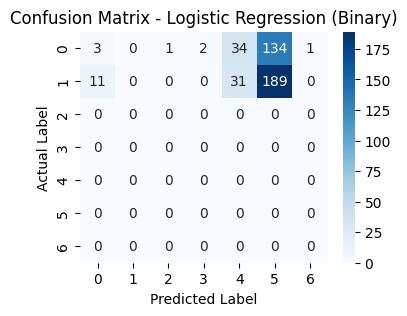

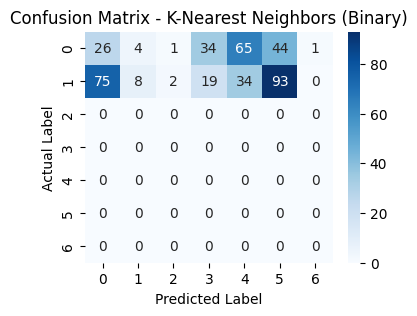

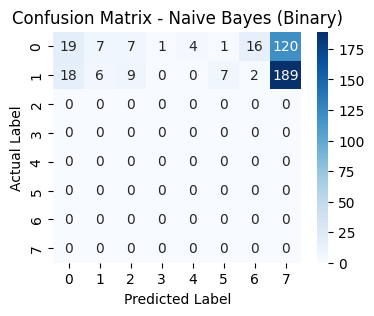

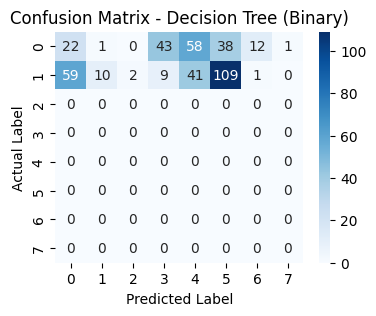

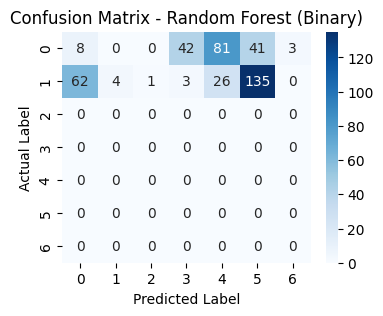

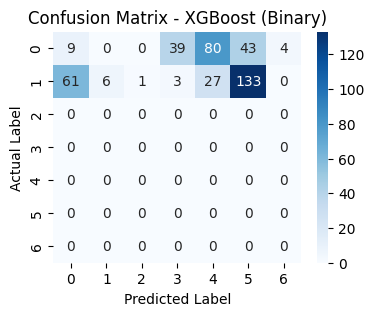

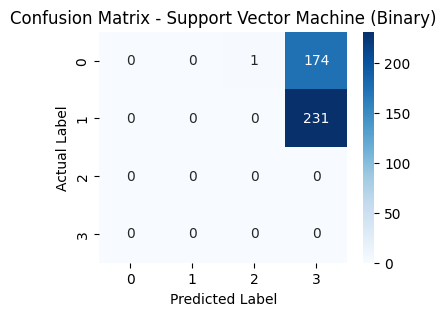

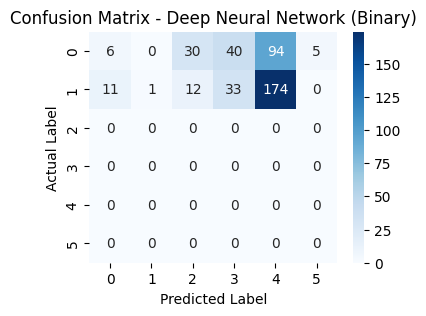


--- Multi-Class Classification Confusion Matrices ---


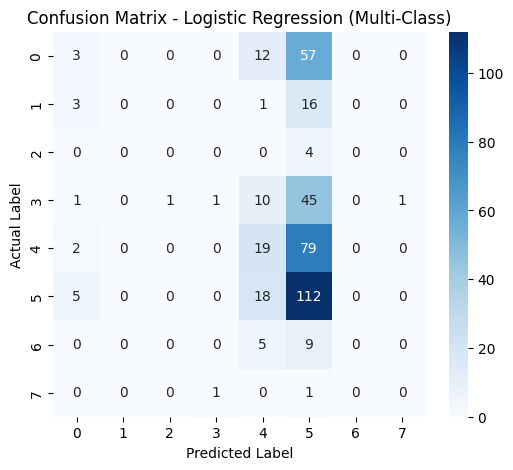

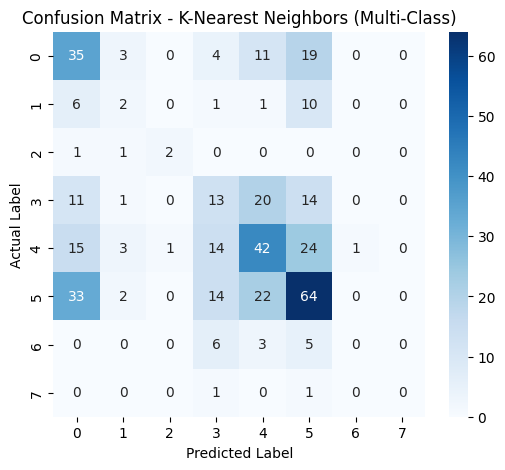

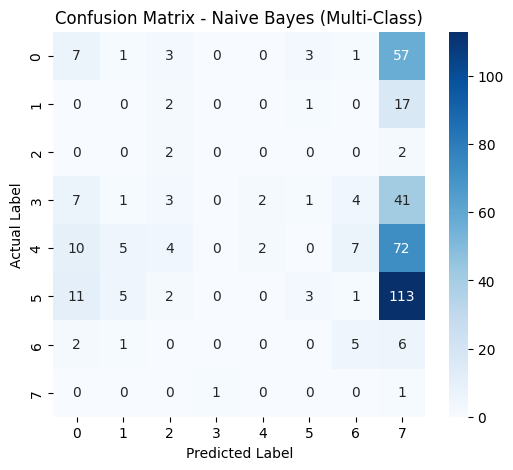

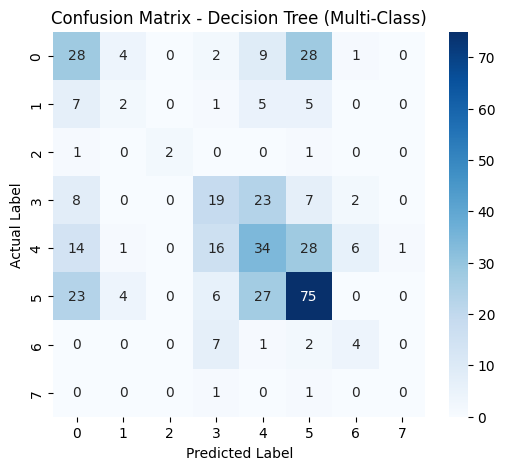

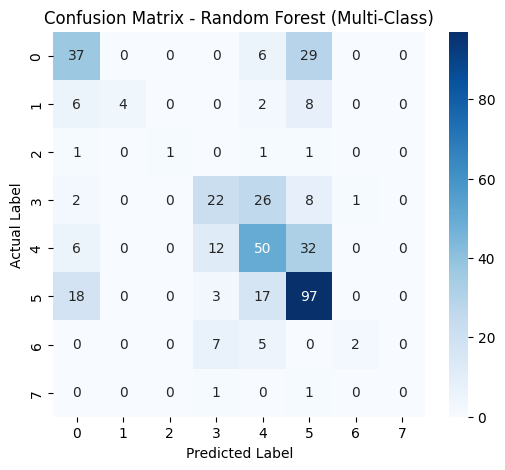

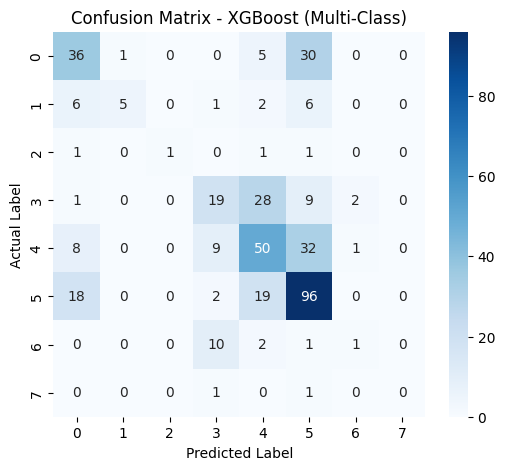

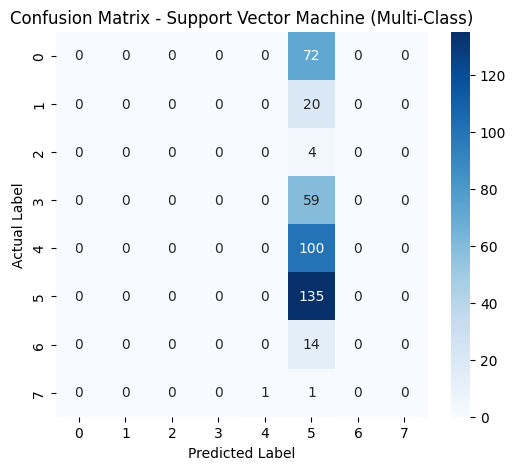

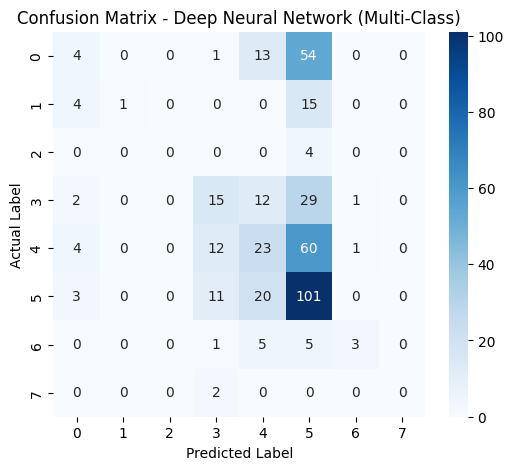

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store confusion matrices for binary classification
binary_cm_results = {}
print("\n--- Binary Classification Confusion Matrices ---")
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_binary)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred)
    binary_cm_results[name] = cm

    # Display confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (Binary)')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Dictionary to store confusion matrices for multi-class classification
multiclass_cm_results = {}
print("\n--- Multi-Class Classification Confusion Matrices ---")
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_multiclass)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_multiclass, y_pred)
    multiclass_cm_results[name] = cm

    # Display confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (Multi-Class)')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()